In [ ]:
from google.colab import drive
drive.mount("/content/drvie", force_remount=True)

Mounted at /content/drvie


In [ ]:
import pandas as pd 
inmuebles = pd.read_csv("/content/drvie/MyDrive/Inmersión en datos/data/inmuebles_bogota.csv") 
columnas = {"Baños": "Banos", "Área": "Area"} 
inmuebles = inmuebles.rename(columns=columnas) 

In [ ]:
precio = inmuebles.Valor.str.split(expand=True)
inmuebles["Precio"] = (precio[1].str.replace(".","").astype("float"))/1000000
inmuebles["PrecioMetro"] = round(inmuebles.Precio/inmuebles.Area,2)
barrio_precio = inmuebles.groupby("Barrio").mean().PrecioMetro.to_frame().reset_index()
barrio_precio

<ipython-input-4-19dc380c6ab3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inmuebles["Precio"] = (precio[1].str.replace(".","").astype("float"))/1000000


,Barrio,PrecioMetro
0,Alameda,5.980000
1,Alhambra,4.327647
2,Andes Norte,6.050000
3,Antonio Nariño,3.530208
4,Barrancas,4.416667
...,...,...
144,Villa Maria,2.046154
145,Villas De Granada,3.169545
146,Villemar,3.988889
147,Zona Franca,2.960000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos_raw = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Identificación (Capítulo A).csv', sep = ';',encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
datos_b = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')

<ipython-input-7-a3d2a0d3ed1f>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-7-a3d2a0d3ed1f>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')


In [ ]:
datos_dane = pd.merge(datos_raw,datos_b,on='DIRECTORIO', how='left')
datos_dane = pd.merge(datos_raw,datos_c,on='DIRECTORIO', how='left')
datos_dane = pd.merge(datos_raw,datos_e,on='DIRECTORIO', how='left')

In [ ]:
datos_dane = pd.read_csv("/content/drvie/MyDrive/Inmersión en datos/data/datos_dane.csv")
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [ ]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [ ]:
datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.0,1.0,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.0,1.0,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.0,1.0,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.0,1.0,0,1,0


In [ ]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.106667,0.813333,0.146667,0.106667,0.440000,0.160000,1.493860e+06,0.840000,0.080000,0.320000,0.200000
Américas,0.616822,0.747664,0.018692,0.214953,0.392523,0.084112,2.672138e+06,0.943925,0.028037,0.280374,0.149533
Apogeo,0.349206,0.698413,0.253968,0.063492,0.317460,0.000000,1.837583e+06,0.920635,0.079365,0.349206,0.079365
Arborizadora,0.569892,0.698925,0.053763,0.118280,0.311828,0.161290,1.802297e+06,0.967742,0.118280,0.387097,0.182796
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.632653,0.673469,0.010204,0.020408,0.295918,0.132653,2.943731e+06,0.948980,0.051020,0.295918,0.061224
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
Venecia,0.472222,0.819444,0.236111,0.291667,0.500000,0.361111,2.078713e+06,0.833333,0.138889,0.402778,0.250000
Verbenal,0.771429,0.561905,0.076190,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714


In [19]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,PrecioMetro,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.14,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.94,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.78,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.78,...,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.58,...,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503


In [21]:
upz = pd.read_csv('/content/drvie/MyDrive/Inmersión en datos/data/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Precio                    9318 non-null   float64
 9   PrecioMetro               9318 non-null   float64
 10  CONJUNTO_CERRADO          9318 non-null   float64
 11  INSEGURIDAD               9318 non-null   float64
 12  TERMINALES_BUS            9318 non-null   float64
 13  BARES_DISCO               9318 non-null   float64
 14  RUIDO   

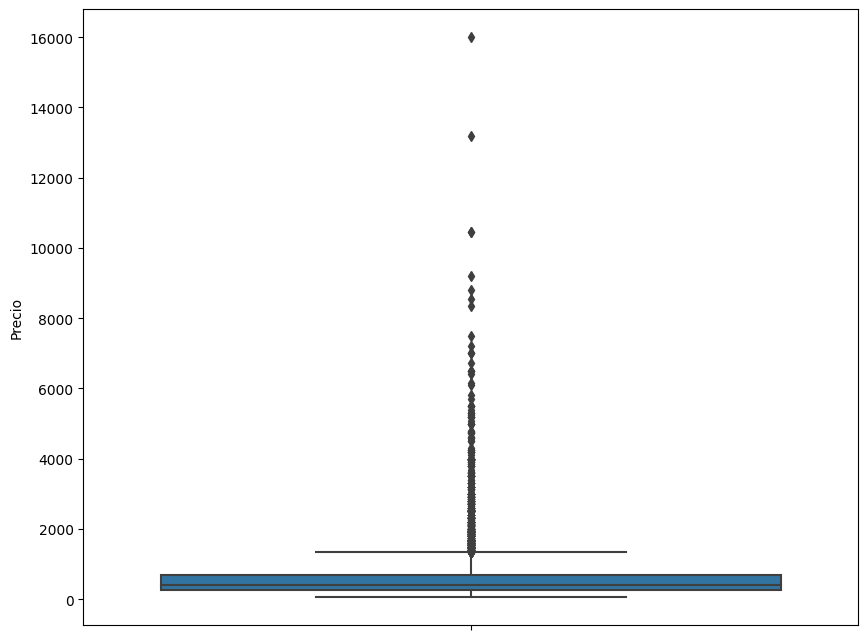

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio')
plt.show()

In [32]:
datos_ml = datos_ml.query('Precio < 1200 & Precio > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,PrecioMetro,...,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO_x,COD_UPZ_GRUPO_x,NOMBRE_ESTRATO_y,COD_UPZ_GRUPO_y
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.14,...,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,CHAPINERO: Pardo Rubio + Chapinero,816.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,300.0,2.04,...,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,CHAPINERO: Pardo Rubio + Chapinero,816.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,239.0,5.31,...,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,CHAPINERO: Pardo Rubio + Chapinero,816.0
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,580.0,2.90,...,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,CHAPINERO: Pardo Rubio + Chapinero,816.0
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,278.0,3.56,...,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0,CHAPINERO: Pardo Rubio + Chapinero,816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,250.0,5.21,...,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,Verbenal,9.0
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,180.0,4.74,...,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,Verbenal,9.0
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,180.0,4.74,...,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,Verbenal,9.0
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,240.0,5.00,...,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0,Verbenal,9.0


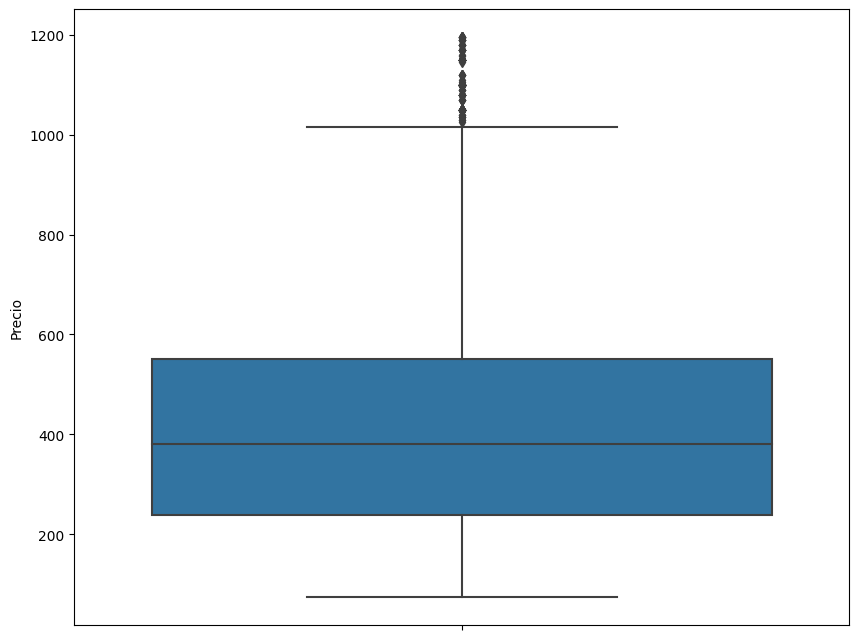

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio')
plt.show()

In [42]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml.SALARIO_ANUAL_MI

0       48.417456
1       48.417456
3       48.417456
9       48.417456
10      48.417456
          ...    
9313    29.344838
9314    29.344838
9315    29.344838
9316    29.344838
9317    29.344838
Name: SALARIO_ANUAL_MI, Length: 8313, dtype: float64

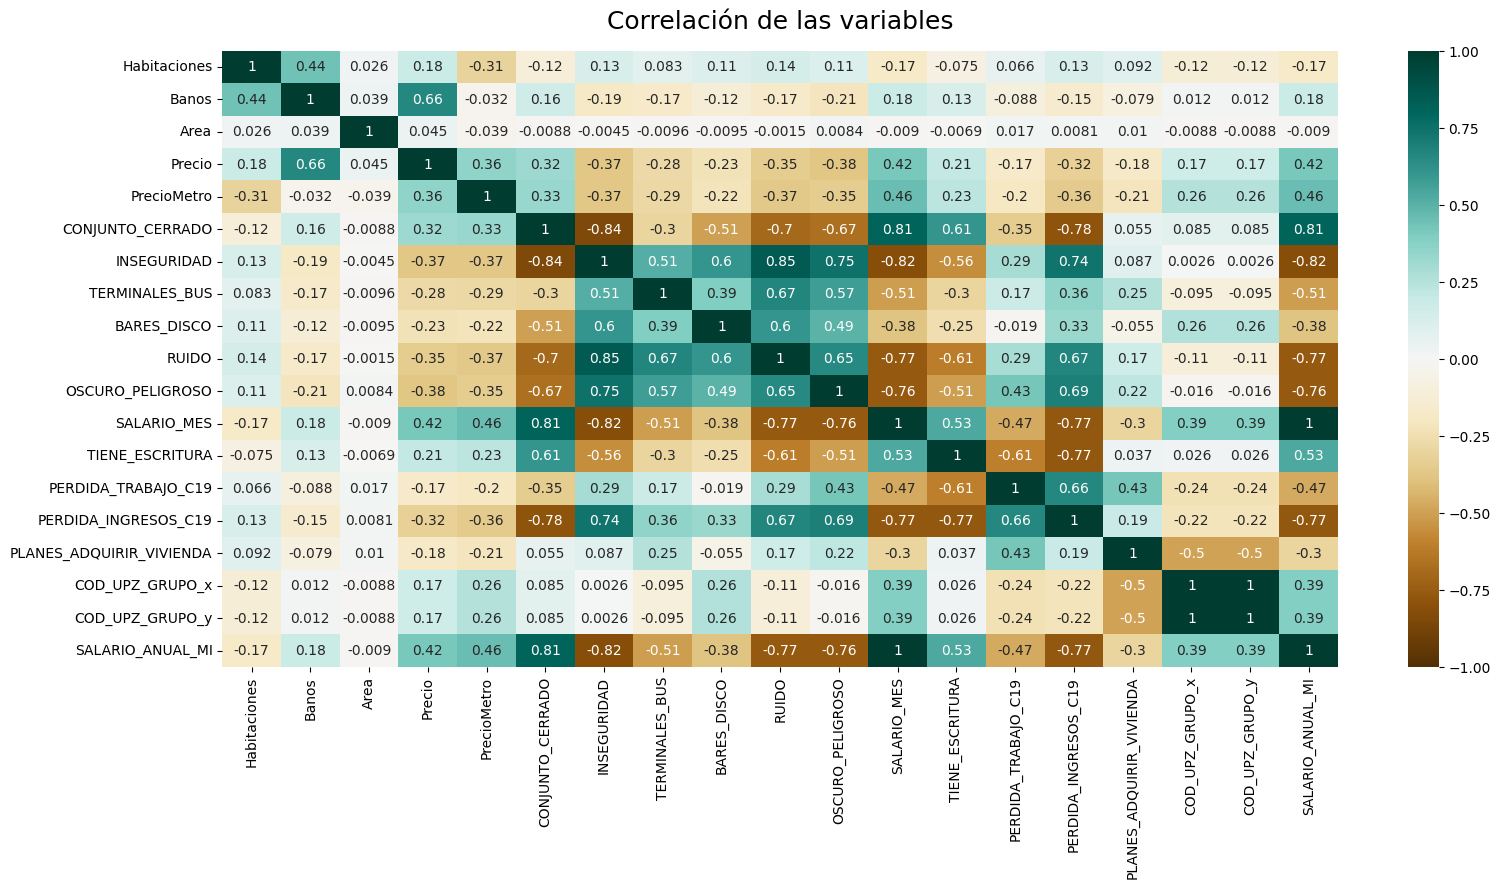

In [36]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = datos_ml[['COD_UPZ_GRUPO_y','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']] 
y = datos_ml["Precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988
